In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt

In [6]:
students_performance = pd.read_csv('https://stepik.org/media/attachments/course/4852/StudentsPerformance.csv')
students_performance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [8]:
students_performance.head(3)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93


In [19]:
students_performance.iloc[::, [0, 2, 5]]

,gender,parental level of education,math score
0,female,bachelor's degree,72
1,female,some college,69
2,female,master's degree,90
3,male,associate's degree,47
4,male,some college,76
...,...,...,...
995,female,master's degree,88
996,male,high school,62
997,female,high school,59
998,female,some college,68


In [20]:
students_performance.iloc[:3]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93


In [21]:
students_performance.loc[:3]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44


У какой доли студентов из датасэта в колонке lunch указано free/reduced?
Формат ответа десятичная дробь, например, 0.25

In [41]:
students_performance.groupby('lunch')['lunch'].count()/students_performance.shape[0]

lunch
free/reduced    0.355
standard        0.645
Name: lunch, dtype: float64

In [42]:
students_performance['lunch'].value_counts(normalize=True)

standard        0.645
free/reduced    0.355
Name: lunch, dtype: float64

In [44]:
students_performance.groupby('lunch')['math score', 'reading score', 'writing score'].describe().T

/var/folders/6v/dfp997q13894cjhs_bzmt6j40000gn/T/ipykernel_45118/957298985.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  students_performance.groupby('lunch')['math score', 'reading score', 'writing score'].describe().T


lunch                free/reduced    standard
math score    count    355.000000  645.000000
              mean      58.921127   70.034109
              std       15.159956   13.653501
              min        0.000000   19.000000
              25%       49.000000   61.000000
              50%       60.000000   69.000000
              75%       69.000000   80.000000
              max      100.000000  100.000000
reading score count    355.000000  645.000000
              mean      64.653521   71.654264
              std       14.895339   13.830602
              min       17.000000   26.000000
              25%       56.000000   63.000000
              50%       65.000000   72.000000
              75%       75.000000   82.000000
              max      100.000000  100.000000
writing score count    355.000000  645.000000
              mean      63.022535   70.823256
              std       15.433823   14.339487
              min       10.000000   22.000000
              25%       53.000000   62.000000
              50%       64.000000   72.000000
              75%       74.000000   81.000000
              max      100.000000  100.000000

In [46]:
students_performance.groupby('lunch').describe().T

lunch                free/reduced    standard
math score    count    355.000000  645.000000
              mean      58.921127   70.034109
              std       15.159956   13.653501
              min        0.000000   19.000000
              25%       49.000000   61.000000
              50%       60.000000   69.000000
              75%       69.000000   80.000000
              max      100.000000  100.000000
reading score count    355.000000  645.000000
              mean      64.653521   71.654264
              std       14.895339   13.830602
              min       17.000000   26.000000
              25%       56.000000   63.000000
              50%       65.000000   72.000000
              75%       75.000000   82.000000
              max      100.000000  100.000000
writing score count    355.000000  645.000000
              mean      63.022535   70.823256
              std       15.433823   14.339487
              min       10.000000   22.000000
              25%       53.000000   62.000000
              50%       64.000000   72.000000
              75%       74.000000   81.000000
              max      100.000000  100.000000

In [47]:
students_performance.groupby('lunch').agg([np.mean, np.var]).T

/var/folders/6v/dfp997q13894cjhs_bzmt6j40000gn/T/ipykernel_45118/3863021578.py:1: FutureWarning: ['gender', 'race/ethnicity', 'parental level of education', 'test preparation course'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  students_performance.groupby('lunch').agg([np.mean, np.var]).T


lunch               free/reduced    standard
math score    mean     58.921127   70.034109
              var     229.824270  186.418089
reading score mean     64.653521   71.654264
              var     221.871139  191.285560
writing score mean     63.022535   70.823256
              var     238.202881  205.620887

In [48]:
student_stats = pd.read_csv('https://stepik.org/media/attachments/course/4852/StudentsPerformance.csv')
student_stats.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [49]:
students_performance = students_performance.rename(columns=lambda col: col.replace(" ", "_"))
students_performance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [64]:
students_performance.query('reading_score > 90 & gender == "female" & lunch == "standard"')

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
2,female,group B,master's degree,standard,none,90,95,93
6,female,group B,some college,standard,completed,88,95,92
102,female,group D,associate's degree,standard,none,85,91,89
106,female,group D,master's degree,standard,none,87,100,100
114,female,group E,bachelor's degree,standard,completed,99,100,100
120,female,group C,bachelor's degree,standard,completed,79,92,89
122,female,group C,some college,standard,completed,88,93,93
125,female,group B,high school,standard,none,87,95,86
164,female,group E,master's degree,standard,none,81,92,91
165,female,group C,bachelor's degree,standard,completed,96,100,100


In [67]:
score_filter = [i for i in students_performance.columns if 'score' in i]
score_filter

['math_score', 'reading_score', 'writing_score']

In [68]:
score_filter = [i for i in list(students_performance) if 'score' in i]
score_filter

['math_score', 'reading_score', 'writing_score']

In [69]:
students_performance.filter(like='score')

,math_score,reading_score,writing_score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75
...,...,...,...
995,88,99,95
996,62,55,55
997,59,71,65
998,68,78,77


In [71]:
students_performance.filter(like='10', axis=0)

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
10,male,group C,associate's degree,standard,none,58,54,52
100,male,group B,some college,standard,none,79,67,67
101,male,group D,bachelor's degree,standard,completed,68,74,74
102,female,group D,associate's degree,standard,none,85,91,89
103,male,group B,high school,standard,completed,60,44,47
104,male,group C,some college,standard,completed,98,86,90
105,female,group C,some college,standard,none,58,67,72
106,female,group D,master's degree,standard,none,87,100,100
107,male,group E,associate's degree,standard,completed,66,63,64
108,female,group B,associate's degree,free/reduced,none,52,76,70


In [78]:
students_performance.filter(regex='^ra.*')

,race/ethnicity
0,group B
1,group C
2,group B
3,group A
4,group C
...,...
995,group E
996,group C
997,group C
998,group D


In [79]:
students_performance.filter(regex='.*e$')

,test_preparation_course,math_score,reading_score,writing_score
0,none,72,72,74
1,completed,69,90,88
2,none,90,95,93
3,none,47,57,44
4,none,76,78,75
...,...,...,...,...
995,completed,88,99,95
996,none,62,55,55
997,completed,59,71,65
998,completed,68,78,77


In [101]:
df = pd.read_csv('https://stepik.org/media/attachments/course/4852/column_hell.csv')
df.head()

,yrh&6,ohku,q,hfxx,umeca-4,apj,g,ijvnixxo,kudbpyw-3,upubjv,...,fi,clsruyy,g&6,qo$6,ap,o,sladymzr,tif,wuikzxt,wzuvc
0,0.288397,0.911359,0.488069,0.074599,0.016124,0.090555,0.560810,0.110975,0.430787,0.548763,...,0.793122,0.070335,0.145115,0.686579,0.071681,0.563068,0.815201,0.081902,0.333237,0.185148
1,0.861276,0.134987,0.701885,0.897921,0.507115,0.740151,0.963179,0.712024,0.671662,0.497596,...,0.477181,0.767931,0.996055,0.948774,0.054327,0.087341,0.072166,0.856081,0.120481,0.622113
2,0.775577,0.832874,0.862665,0.831049,0.003274,0.703112,0.509795,0.573296,0.286411,0.282792,...,0.421542,0.770413,0.749468,0.395022,0.307752,0.535575,0.341393,0.971201,0.714558,0.702453
3,0.857910,0.555818,0.598305,0.473988,0.784139,0.427963,0.725103,0.286610,0.863717,0.545562,...,0.240252,0.010355,0.759912,0.965837,0.110719,0.439488,0.816526,0.111621,0.373365,0.461615
4,0.748652,0.451725,0.252619,0.584361,0.011265,0.051115,0.755444,0.627191,0.206172,0.955043,...,0.846165,0.043458,0.209347,0.028276,0.700446,0.203503,0.181903,0.428842,0.099398,0.175227


In [83]:
selected_columns = df.filter(like='-')
selected_columns

,umeca-4,kudbpyw-3,g-3,v-9,fla-6,hwtbyrkp-5
0,0.016124,0.430787,0.202407,0.725508,0.305076,0.979296
1,0.507115,0.671662,0.864249,0.867818,0.358859,0.160520
2,0.003274,0.286411,0.928865,0.719159,0.340235,0.734612
3,0.784139,0.863717,0.175446,0.554744,0.049325,0.621132
4,0.011265,0.206172,0.044151,0.163643,0.048806,0.437836
...,...,...,...,...,...,...
95,0.220817,0.434444,0.601738,0.146333,0.918888,0.216499
96,0.474131,0.176011,0.359793,0.104707,0.257690,0.066934
97,0.091637,0.871606,0.121075,0.907699,0.313184,0.788592
98,0.360106,0.172385,0.015285,0.019571,0.060751,0.403166


In [97]:
selected_columns = df.filter(regex='^[a-z]{5,7}-')
selected_columns

,umeca-4,kudbpyw-3
0,0.016124,0.430787
1,0.507115,0.671662
2,0.003274,0.286411
3,0.784139,0.863717
4,0.011265,0.206172
...,...,...
95,0.220817,0.434444
96,0.474131,0.176011
97,0.091637,0.871606
98,0.360106,0.172385


In [102]:
df = pd.read_csv('https://stepik.org/media/attachments/course/4852/StudentsPerformance.csv').rename(columns=lambda col: col.replace(" ", "_"))
df.head(3)

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93


In [104]:
df_agg = df.groupby('gender').aggregate({'math_score': 'sum', 'reading_score': 'mean'}).\
    rename(columns={'math_score': 'math_score_sum', 'reading_score': 'reading_score_mean'})
df_agg

,math_score_sum,reading_score_mean
gender,,
female,32962,72.608108
male,33127,65.473029


In [105]:
df_agg = df.groupby('gender', as_index=False).aggregate({'math_score': 'sum', 'reading_score': 'mean'}).\
    rename(columns={'math_score': 'math_score_sum', 'reading_score': 'reading_score_mean'})
df_agg

,gender,math_score_sum,reading_score_mean
0,female,32962,72.608108
1,male,33127,65.473029


In [109]:
df_agg = df.groupby(['gender', 'race/ethnicity']).aggregate({'math_score': 'max', 'reading_score': 'mean'}).\
    rename(columns={'math_score': 'math_score_max', 'reading_score': 'reading_score_mean'})
df_agg

math_score_max  reading_score_mean
gender race/ethnicity                                    
female group A                     92           69.000000
       group B                     97           71.076923
       group C                     96           71.944444
       group D                     98           74.046512
       group E                    100           75.840580
male   group A                    100           61.735849
       group B                     94           62.848837
       group C                     98           65.424460
       group D                    100           66.135338
       group E                    100           70.295775

In [111]:
df_agg.loc[[('female', 'group A'), ('male', 'group B')]]

,,math_score_max,reading_score_mean
gender,race/ethnicity,,
female,group A,92,69.000000
male,group B,94,62.848837


In [115]:
df_top = df.sort_values(['gender', 'math_score'], ascending=False).groupby('gender').head()
df_top

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
149,male,group E,associate's degree,free/reduced,completed,100,100,93
623,male,group A,some college,standard,completed,100,96,86
625,male,group D,some college,standard,completed,100,97,99
916,male,group E,bachelor's degree,standard,completed,100,100,100
306,male,group E,some college,standard,completed,99,87,81
451,female,group E,some college,standard,none,100,92,97
458,female,group E,bachelor's degree,standard,none,100,100,100
962,female,group E,associate's degree,standard,none,100,100,100
114,female,group E,bachelor's degree,standard,completed,99,100,100
263,female,group E,high school,standard,none,99,93,90


In [120]:
df['total_score'] = df.writing_score + df.reading_score + df.math_score
df

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total,total_score
0,female,group B,bachelor's degree,standard,none,72,72,74,66161,218
1,female,group C,some college,standard,completed,69,90,88,66179,247
2,female,group B,master's degree,standard,none,90,95,93,66184,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,66146,148
4,male,group C,some college,standard,none,76,78,75,66167,229
...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,66188,282
996,male,group C,high school,free/reduced,none,62,55,55,66144,172
997,female,group C,high school,free/reduced,completed,59,71,65,66160,195
998,female,group D,some college,standard,completed,68,78,77,66167,223


In [125]:
df = df.assign(math_score_log = np.log(df.math_score), reading_score_log = np.log(df.reading_score))
df

/Users/mitya/venv/lib/python3.10/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,math_score_log,reading_score_log
0,female,group B,bachelor's degree,standard,none,72,72,74,218,4.276666,4.276666
1,female,group C,some college,standard,completed,69,90,88,247,4.234107,4.499810
2,female,group B,master's degree,standard,none,90,95,93,278,4.499810,4.553877
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,3.850148,4.043051
4,male,group C,some college,standard,none,76,78,75,229,4.330733,4.356709
...,...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,282,4.477337,4.595120
996,male,group C,high school,free/reduced,none,62,55,55,172,4.127134,4.007333
997,female,group C,high school,free/reduced,completed,59,71,65,195,4.077537,4.262680
998,female,group D,some college,standard,completed,68,78,77,223,4.219508,4.356709


In [124]:
df = df.drop(['total'], axis=1)
df

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,282
996,male,group C,high school,free/reduced,none,62,55,55,172
997,female,group C,high school,free/reduced,completed,59,71,65,195
998,female,group D,some college,standard,completed,68,78,77,223


Пересчитаем число ног у героев игры Dota2! Сгруппируйте героев из датасэта по числу их ног (колонка legs), и заполните их число в задании ниже.

Данные взяты <a href='https://api.opendota.com/api/heroes'>отсюда</a>, на этом же <a href='https://www.opendota.com/'>сайте</a> можно найти <a htref='https://docs.opendota.com/#tag/heroes'>больше разнообразных данных</a> по Dota2.

In [126]:
df_dota = pd.read_csv('https://stepik.org/media/attachments/course/4852/dota_hero_stats.csv')
df_dota.head()

,Unnamed: 0,attack_type,id,legs,localized_name,name,primary_attr,roles
0,0,Melee,1,2,Anti-Mage,npc_dota_hero_antimage,agi,"['Carry', 'Escape', 'Nuker']"
1,1,Melee,2,2,Axe,npc_dota_hero_axe,str,"['Initiator', 'Durable', 'Disabler', 'Jungler']"
2,2,Ranged,3,4,Bane,npc_dota_hero_bane,int,"['Support', 'Disabler', 'Nuker', 'Durable']"
3,3,Melee,4,2,Bloodseeker,npc_dota_hero_bloodseeker,agi,"['Carry', 'Disabler', 'Jungler', 'Nuker', 'Ini..."
4,4,Ranged,5,2,Crystal Maiden,npc_dota_hero_crystal_maiden,int,"['Support', 'Disabler', 'Nuker', 'Jungler']"


In [132]:
df_dota.groupby('legs').aggregate({'legs': 'count'}).rename(columns={'legs': 'count'})

,count
legs,
0,11
2,95
4,7
6,3
8,1


К нам поступили данные из бухгалтерии о заработках Лупы и Пупы за разные задачи! Посмотрите у кого из них больше средний заработок в различных категориях (колонка Type) и заполните таблицу, указывая исполнителя с большим заработком в каждой из категорий.

In [152]:
df_salary = pd.read_csv('https://stepik.org/media/attachments/course/4852/accountancy.csv')
df_salary.head()

,Unnamed: 0,Executor,Type,Salary
0,0,Pupa,D,63
1,1,Pupa,A,158
2,2,Pupa,D,194
3,3,Pupa,E,109
4,4,Loopa,E,184


In [149]:
salary_table = pd.crosstab(df_salary.Type, df_salary.Executor, values=df_salary.Salary, aggfunc='mean')
salary_table

Executor,Loopa,Pupa
Type,,
A,58.000000,160.833333
B,145.166667,77.000000
C,154.333333,74.500000
D,137.714286,146.500000
E,164.000000,131.200000
F,238.000000,136.250000


In [163]:
table = pd.pivot_table(df_salary, values='Salary', index='Executor',
                    columns=['Type'], aggfunc='mean')
table

Type,A,B,C,D,E,F
Executor,,,,,,
Loopa,58.000000,145.166667,154.333333,137.714286,164.0,238.00
Pupa,160.833333,77.000000,74.500000,146.500000,131.2,136.25


In [164]:
table.idxmax()

Type
A     Pupa
B    Loopa
C    Loopa
D     Pupa
E    Loopa
F    Loopa
dtype: object

In [154]:
df_salary = pd.read_csv('https://stepik.org/media/attachments/course/4852/accountancy.csv')
df_salary.groupby(['Type','Executor']).mean().unstack()

Unnamed: 0             Salary            
Executor      Loopa   Pupa       Loopa        Pupa
Type                                              
A         46.000000  16.00   58.000000  160.833333
B         24.000000  41.00  145.166667   77.000000
C         31.666667  23.00  154.333333   74.500000
D         31.857143  14.00  137.714286  146.500000
E         23.500000  19.80  164.000000  131.200000
F         20.000000  25.75  238.000000  136.250000

In [155]:
df_salary.groupby(['Type', 'Executor']).mean()

Unnamed: 0      Salary
Type Executor                        
A    Loopa      46.000000   58.000000
     Pupa       16.000000  160.833333
B    Loopa      24.000000  145.166667
     Pupa       41.000000   77.000000
C    Loopa      31.666667  154.333333
     Pupa       23.000000   74.500000
D    Loopa      31.857143  137.714286
     Pupa       14.000000  146.500000
E    Loopa      23.500000  164.000000
     Pupa       19.800000  131.200000
F    Loopa      20.000000  238.000000
     Pupa       25.750000  136.250000

In [157]:
df_salary.groupby(['Executor', 'Type']).aggregate({'Salary': 'mean'})

Salary
Executor Type            
Loopa    A      58.000000
         B     145.166667
         C     154.333333
         D     137.714286
         E     164.000000
         F     238.000000
Pupa     A     160.833333
         B      77.000000
         C      74.500000
         D     146.500000
         E     131.200000
         F     136.250000

In [159]:
df_salary.groupby(['Type', 'Executor']).aggregate({'Salary':'mean'}).T

Type         A                       B                 C                 D  \
Executor Loopa        Pupa       Loopa  Pupa       Loopa  Pupa       Loopa   
Salary    58.0  160.833333  145.166667  77.0  154.333333  74.5  137.714286   

Type                 E             F          
Executor   Pupa  Loopa   Pupa  Loopa    Pupa  
Salary    146.5  164.0  131.2  238.0  136.25

In [160]:
data = df_salary.groupby(['Executor', 'Type'])['Salary'].mean()
data.loc[('Loopa')] > data.loc['Pupa']

Type
A    False
B     True
C     True
D    False
E     True
F     True
Name: Salary, dtype: bool

In [165]:
df_dota.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      117 non-null    int64 
 1   attack_type     117 non-null    object
 2   id              117 non-null    int64 
 3   legs            117 non-null    int64 
 4   localized_name  117 non-null    object
 5   name            117 non-null    object
 6   primary_attr    117 non-null    object
 7   roles           117 non-null    object
dtypes: int64(3), object(5)
memory usage: 7.4+ KB


In [173]:
df_dota.groupby(['attack_type', 'primary_attr']).aggregate({'id':'count'}).sort_values(['id'], ascending=False).rename(columns={'id': 'count'})

count
attack_type primary_attr       
Ranged      int              40
Melee       str              35
            agi              19
Ranged      agi              18
            str               3
Melee       int               2

In [174]:
df_dota.groupby(['attack_type', 'primary_attr']).agg({'id':'count'}).idxmax()

id    (Ranged, int)
dtype: object

In [175]:
df_dota.filter(items=['attack_type','primary_attr']).mode()

,attack_type,primary_attr
0,Ranged,int


Аспирант Ростислав изучает метаболом водорослей и получил такую табличку. В ней он записал вид каждой водоросли, её род (группа, объединяющая близкие виды), группа (ещё одно объединение водорослей в крупные фракции) и концентрации анализируемых веществ.

Помогите Ростиславу найти среднюю концентрацию каждого из веществ в каждом из родов (колонка genus)! Для этого проведите группировку датафрэйма, сохранённого в переменной concentrations, и примените метод, сохранив результат в переменной mean_concentrations.

In [187]:
metabolome_df = pd.read_csv('http://stepik.org/media/attachments/course/4852/algae.csv')
metabolome_df.head()

,species,genus,group,sucrose,alanin,citrate,glucose,oleic_acid
0,Fucus_vesiculosus,Fucus,brown,3.001472,3.711498,5.004262,2.548459,6.405165
1,Saccharina_japonica,Saccharina,brown,6.731070,1.255251,5.621499,6.013219,4.156700
2,Fucus_serratus,Fucus,brown,3.276870,0.346431,1.216767,3.623225,0.304573
3,Fucus_distichus,Fucus,brown,6.786996,6.641303,6.423606,2.272724,3.393203
4,Cladophora_fracta,Cladophora,green,3.861470,1.648450,6.940588,2.316955,2.528886


In [178]:
concentrations = metabolome_df.groupby('genus')
mean_concentrations = concentrations.mean()
mean_concentrations

,sucrose,alanin,citrate,glucose,oleic_acid
genus,,,,,
Ascophyllum,6.825467,0.875429,5.253527,3.414961,2.432526
Cladophora,4.008792,3.997055,5.288311,2.800276,2.263472
Fucus,4.355112,3.566411,4.214878,2.814803,3.367647
Palmaria,0.704580,3.176440,5.573905,3.242090,2.245538
Saccharina,4.183596,3.524207,3.346710,4.980594,4.487252


Пользуясь предыдущими данными, укажите через пробел (без запятых) чему равны минимальная, средняя и максимальная концентрации аланина (alanin) среди видов рода Fucus. Округлите до 2-ого знака, десятичным разделителем является точка.

Формат ответа:
0.55 6.77 7.48

In [204]:
describe_stats = metabolome_df.query('genus == "Fucus"')['alanin'].describe()[[1, 3, -1]].round(2).sort_values(ascending=True)
print(*describe_stats)

0.35 3.57 6.64


Сгруппируйте данные по переменной group и соотнесите вопросы с ответами
- Число видов бурых, зелёных и красных водорослей
- Размах (максимум - минимум) сахарозы в бурых, зелёных и красных водорослях
- Дисперсия концентрации цитрата в бурых, зелёных и красных водорослях

In [205]:
metabolome_df.head()

,species,genus,group,sucrose,alanin,citrate,glucose,oleic_acid
0,Fucus_vesiculosus,Fucus,brown,3.001472,3.711498,5.004262,2.548459,6.405165
1,Saccharina_japonica,Saccharina,brown,6.731070,1.255251,5.621499,6.013219,4.156700
2,Fucus_serratus,Fucus,brown,3.276870,0.346431,1.216767,3.623225,0.304573
3,Fucus_distichus,Fucus,brown,6.786996,6.641303,6.423606,2.272724,3.393203
4,Cladophora_fracta,Cladophora,green,3.861470,1.648450,6.940588,2.316955,2.528886


In [216]:
metabolome_df.groupby('group').aggregate({'group':'count', 'sucrose': lambda x: x.max() - x.min(), 'citrate': 'var'})

,group,sucrose,citrate
group,,,
brown,6,5.189345,5.468942
green,3,3.259662,3.950113
red,1,0.000000,NaN


In [219]:
df.head(3)

,species,genus,group,sucrose,alanin,citrate,glucose,oleic_acid
0,Fucus_vesiculosus,Fucus,brown,3.001472,3.711498,5.004262,2.548459,6.405165
1,Saccharina_japonica,Saccharina,brown,6.731070,1.255251,5.621499,6.013219,4.156700
2,Fucus_serratus,Fucus,brown,3.276870,0.346431,1.216767,3.623225,0.304573


In [220]:
df_stud = pd.read_csv('https://stepik.org/media/attachments/course/4852/StudentsPerformance.csv')
df_stud = df_stud.rename(columns=lambda col: col.replace(" ", "_"))
df_stud.head(3)

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93


<AxesSubplot:>

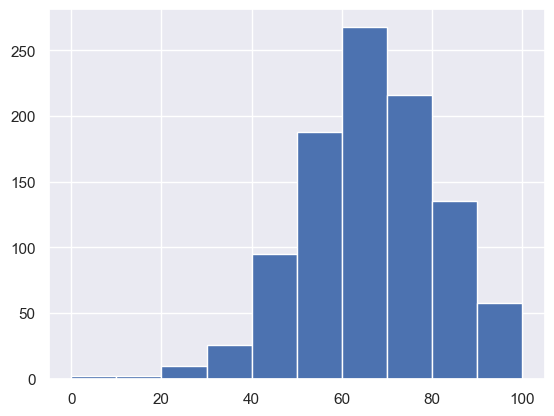

In [222]:
df_stud.math_score.hist()

<AxesSubplot:xlabel='math_score', ylabel='reading_score'>

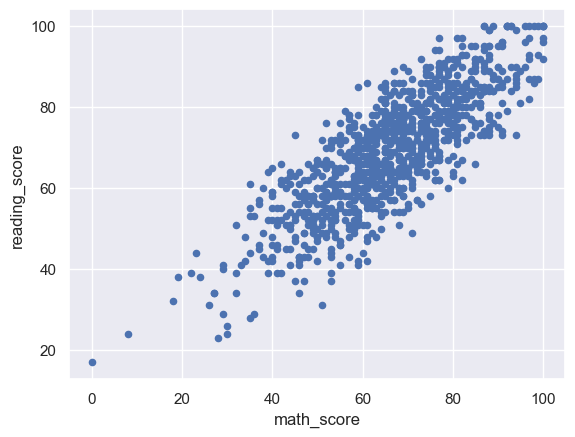

In [225]:
df_stud.plot.scatter(x='math_score', y='reading_score')

<AxesSubplot:xlabel='math_score', ylabel='reading_score'>

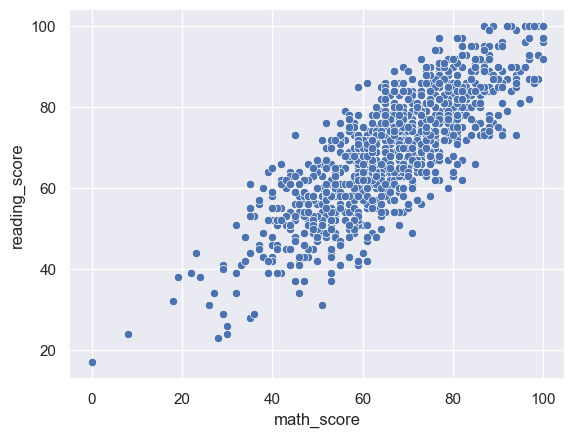

In [226]:
sns.scatterplot(df_stud, x='math_score', y='reading_score')

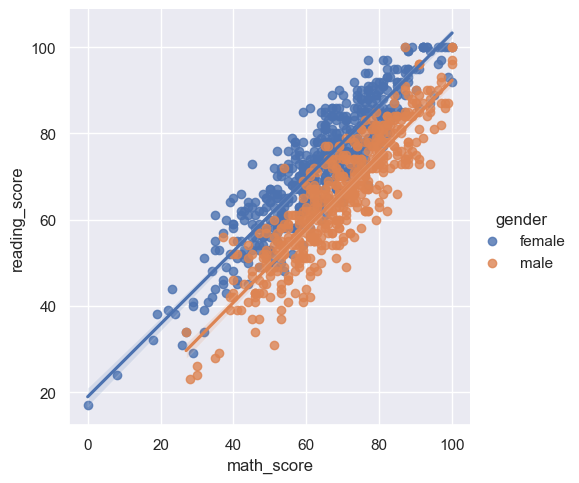

In [228]:
sns.lmplot(df_stud, x='math_score', y='reading_score', hue='gender')

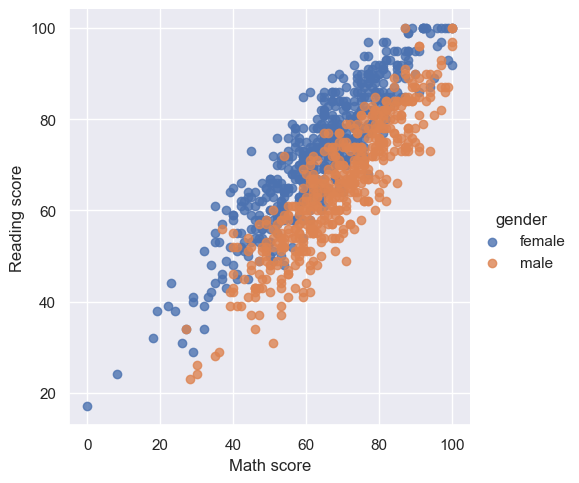

In [231]:
ax = sns.lmplot(df_stud, x='math_score', y='reading_score', hue='gender', fit_reg=False)
ax.set_xlabels('Math score')
ax.set_ylabels('Reading score')
plt.show()

Представьте, что у вас есть датафрэйм df, хранящий данные о зарплате за месяц, со всего 1-ой колонкой income.

Укажите верные способы, как отрисовать простой график зависимости зарплаты от даты (то, как отображается дата сейчас не важно, главное сам график)

Убедитесь, что вы используте версию seaborn > = 0.9.

In [232]:
df_month_salary = pd.read_csv('https://stepik.org/media/attachments/course/4852/income.csv')
df_month_salary.head()

,income
2018-11-30,20
2018-12-31,60
2019-01-31,180
2019-02-28,380
2019-03-31,660


<AxesSubplot:>

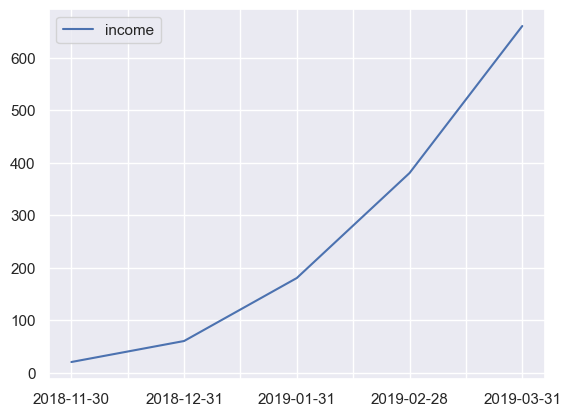

In [233]:
df_month_salary.plot(kind='line')

<AxesSubplot:>

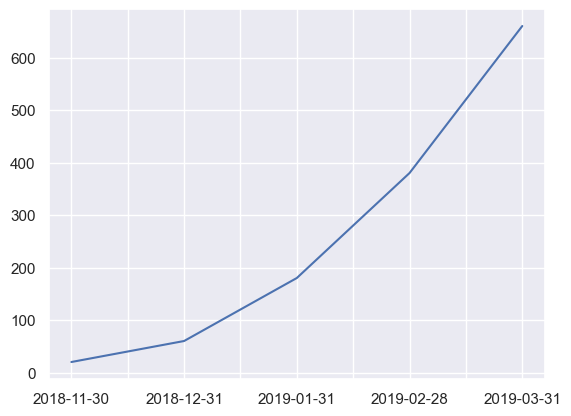

In [234]:
df_month_salary['income'].plot()

<AxesSubplot:>

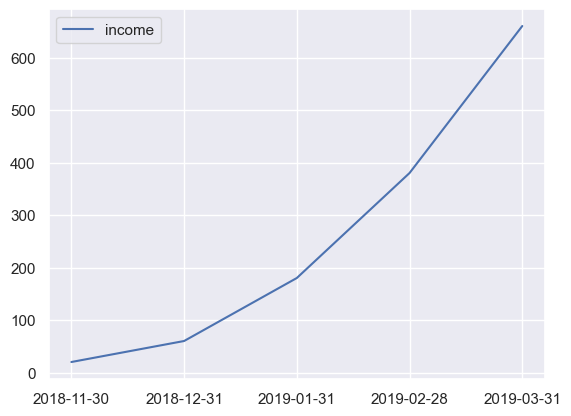

In [235]:
sns.lineplot(data=df_month_salary)

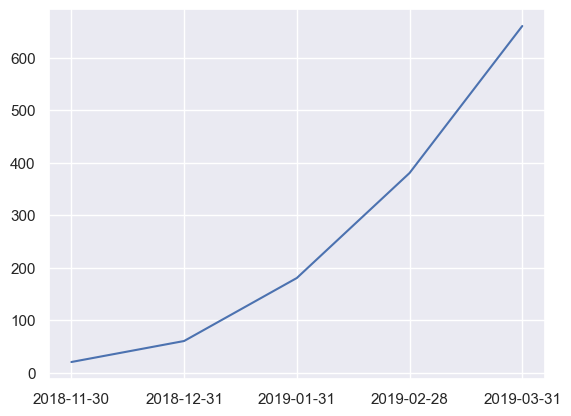

In [236]:
plt.plot(df_month_salary.index, df_month_salary.income)

<AxesSubplot:ylabel='income'>

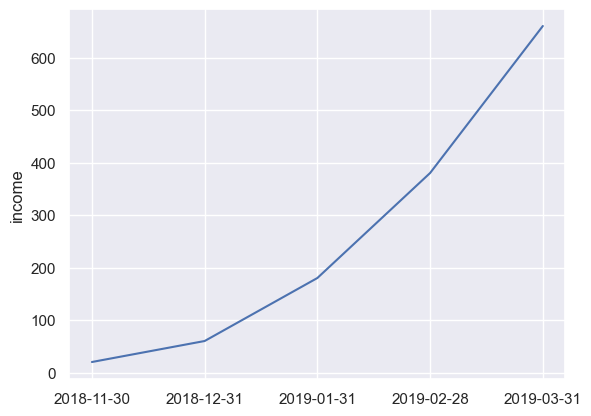

In [237]:
sns.lineplot(x=df_month_salary.index, y=df_month_salary.income)

<AxesSubplot:>

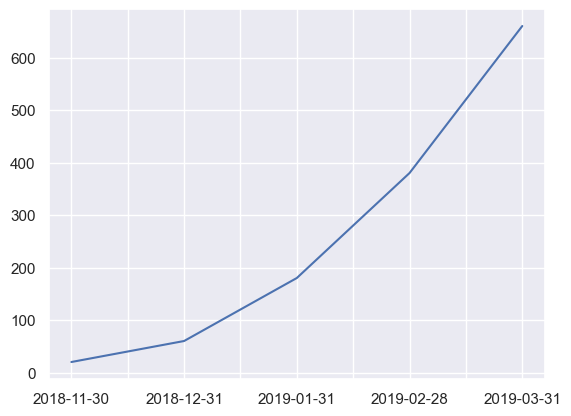

In [238]:
df_month_salary.income.plot()

<AxesSubplot:>

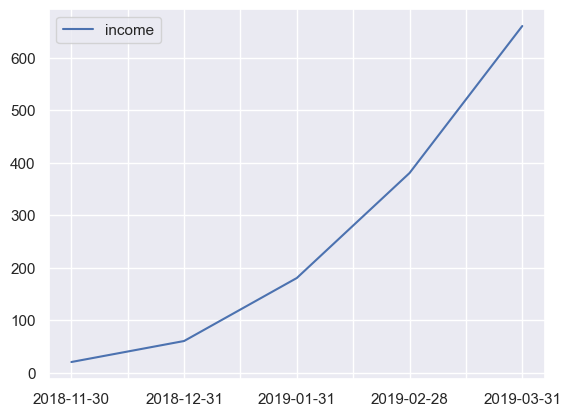

In [239]:
df_month_salary.plot()

Вам дан датасэт с 2-мя фичами (колонками). Постройте график распределения точек (наблюдений) в пространстве этих 2-ух переменных (одна из них будет x, а другая - y) и напишите число кластеров, формируемых наблюдениями.

В ответе вы должны указать число кластеров в виде числа (например: 3).

In [241]:
df = pd.read_csv('/Users/mitya/Downloads/dataset_209770_6.txt', sep=' ')
df.head()

,x,y
0,803.356022,100.644974
1,202.482228,998.508997
2,1102.428182,401.932981
3,808.984883,96.675214
4,1104.631151,411.506192


<AxesSubplot:xlabel='x', ylabel='y'>

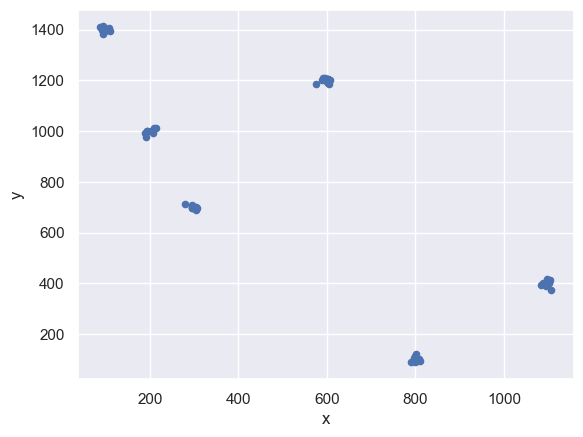

In [243]:
df.plot.scatter(x='x', y='y')

Скачайте данные, представляющие геномные расстояния между видами, и постройте тепловую карту, чтобы различия было видно наглядно. В ответ впишите, какая картинка соответствует скачанным данным.

Чтобы график отображался как на картинках, добавьте

In [251]:
df = pd.read_csv('https://stepik.org/media/attachments/course/4852/genome_matrix.csv', index_col=0)
df.head()

,species0,species1,species2,species3,species4
species0,0.536029,0.920292,0.679708,0.840606,0.430842
species1,0.920292,0.862417,0.887593,0.769754,0.203214
species2,0.679708,0.887593,0.595156,0.003435,0.096052
species3,0.840606,0.769754,0.003435,0.458870,0.029251
species4,0.430842,0.203214,0.096052,0.029251,0.642109


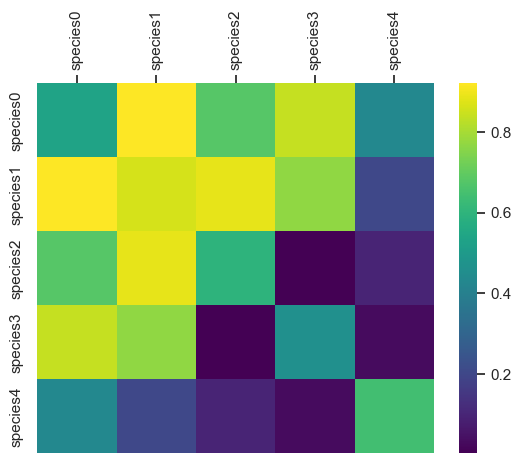

In [250]:
g = sns.heatmap(df, cmap='viridis')
g.xaxis.set_ticks_position('top')
g.xaxis.set_tick_params(rotation=90)

Пришло время узнать, кто самый главный рак какая роль в dota самая распространённая. Скачайте датасэт с данными о героях из игры dota 2 и посмотрите на распределение их возможных ролей в игре (колонка roles). Постройте гистограмму, отражающую скольким героям сколько ролей приписывается (по мнению Valve, конечно) и напишите какое число ролей у большинства героев.

Это задание можно выполнить многими путями, и рисовать гистограмму вообще говоря для этого не нужно.

Данные взяты отсюда, на этом же сайте можно найти больше разнообразных данных по dota 2

In [318]:
df = pd.read_csv('https://stepik.org/media/attachments/course/4852/dota_hero_stats.csv', usecols=['roles'])
df.head()

,roles
0,"['Carry', 'Escape', 'Nuker']"
1,"['Initiator', 'Durable', 'Disabler', 'Jungler']"
2,"['Support', 'Disabler', 'Nuker', 'Durable']"
3,"['Carry', 'Disabler', 'Jungler', 'Nuker', 'Ini..."
4,"['Support', 'Disabler', 'Nuker', 'Jungler']"


<AxesSubplot:>

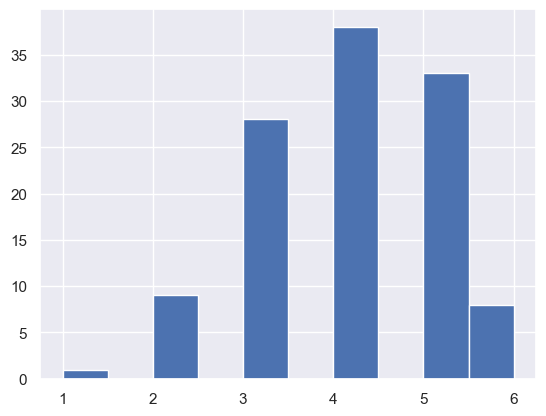

In [299]:
length = [len(i.split(',')) for i in df.roles]
df['length'] = length
df.length.hist()

In [307]:
# разбивает строку
df_1=df.roles.str.split(',')
print(df_1.head())
# добавляет колонку с вычислениями на основе предыдущих колонок
df_1 = df_1.apply(len)
print(df_1.head())
# находит моду
df_1 = df_1.mode()
df_1

0                     [['Carry',  'Escape',  'Nuker']]
1    [['Initiator',  'Durable',  'Disabler',  'Jung...
2     [['Support',  'Disabler',  'Nuker',  'Durable']]
3    [['Carry',  'Disabler',  'Jungler',  'Nuker', ...
4     [['Support',  'Disabler',  'Nuker',  'Jungler']]
Name: roles, dtype: object
0    3
1    4
2    4
3    5
4    4
Name: roles, dtype: int64


0    4
Name: roles, dtype: int64

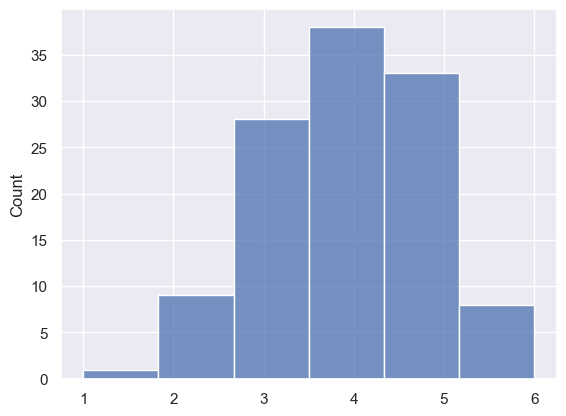

In [310]:
sns.histplot([x.count(',')+1 for x in df.roles], bins=6)
plt.show()

In [314]:
df.roles.map(eval).map(len).mode()

0    4
Name: roles, dtype: int64

In [319]:
# eval — исполняет код на языке питон, переданный в виде строки).
# В нашем случае позволяет преобразовать строку, "выглядящую" как list в настоящий list
df['roles_1'] = df.roles.map(eval)
df

,roles,roles_1
0,"['Carry', 'Escape', 'Nuker']","[Carry, Escape, Nuker]"
1,"['Initiator', 'Durable', 'Disabler', 'Jungler']","[Initiator, Durable, Disabler, Jungler]"
2,"['Support', 'Disabler', 'Nuker', 'Durable']","[Support, Disabler, Nuker, Durable]"
3,"['Carry', 'Disabler', 'Jungler', 'Nuker', 'Ini...","[Carry, Disabler, Jungler, Nuker, Initiator]"
4,"['Support', 'Disabler', 'Nuker', 'Jungler']","[Support, Disabler, Nuker, Jungler]"
...,...,...
112,"['Carry', 'Escape', 'Disabler', 'Initiator']","[Carry, Escape, Disabler, Initiator]"
113,"['Support', 'Nuker', 'Disabler', 'Escape']","[Support, Nuker, Disabler, Escape]"
114,"['Carry', 'Nuker', 'Disabler', 'Durable', 'Esc...","[Carry, Nuker, Disabler, Durable, Escape, Init..."
115,"['Support', 'Nuker', 'Disabler', 'Escape']","[Support, Nuker, Disabler, Escape]"


<AxesSubplot:>

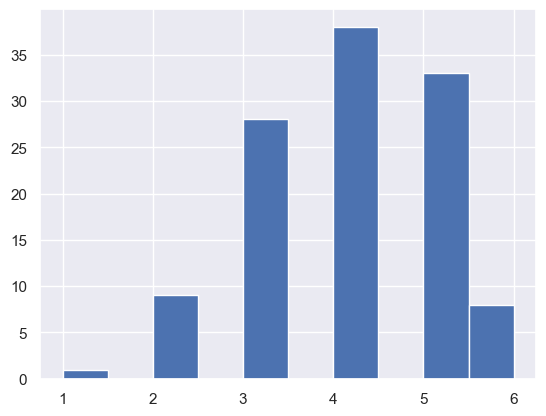

In [320]:
df.roles.map(eval).map(len).hist()

Теперь перейдём к цветочкам. Магистрантка Адель решила изучить какие бывают ирисы. Помогите Адель узнать об ирисах больше - скачайте датасэт со значениями параметров ирисов, постройте их распределения и отметьте правильные утверждения, глядя на график.

Распределение должно быть по всем образцам, без разделения на вид.
Чтобы построить на 1-ом графике распределения для каждого из параметров, можно воспользоваться петлёй

In [322]:
fl_df = pd.read_csv('https://stepik.org/media/attachments/course/4852/iris.csv', index_col=0)
fl_df.head()

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


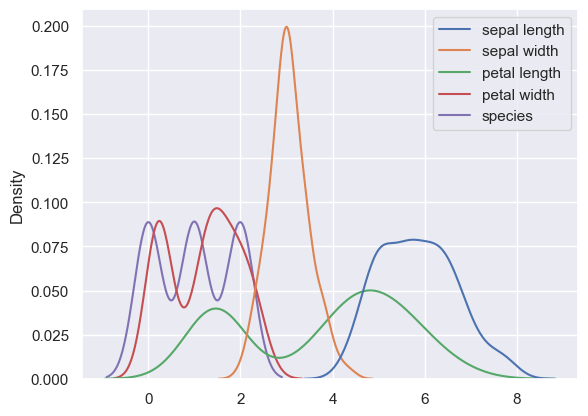

In [352]:
sns.kdeplot(fl_df)
plt.show()

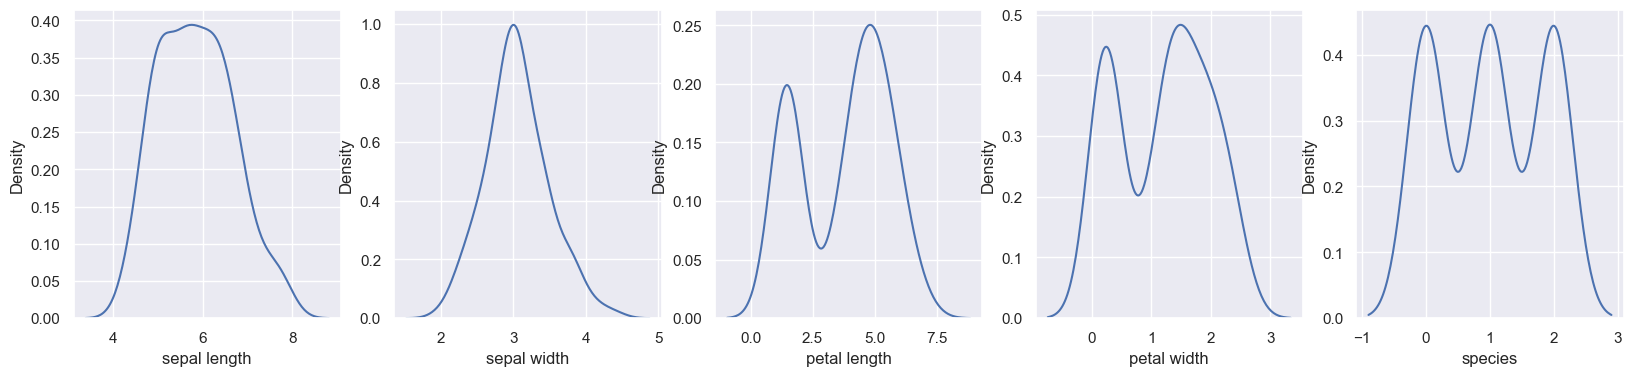

In [374]:
figure, axes = plt.subplots(1, 5, figsize=(20,4))
i = 0
for column in fl_df:
    sns.kdeplot(fl_df, x=column, ax=axes[i])
    i +=1

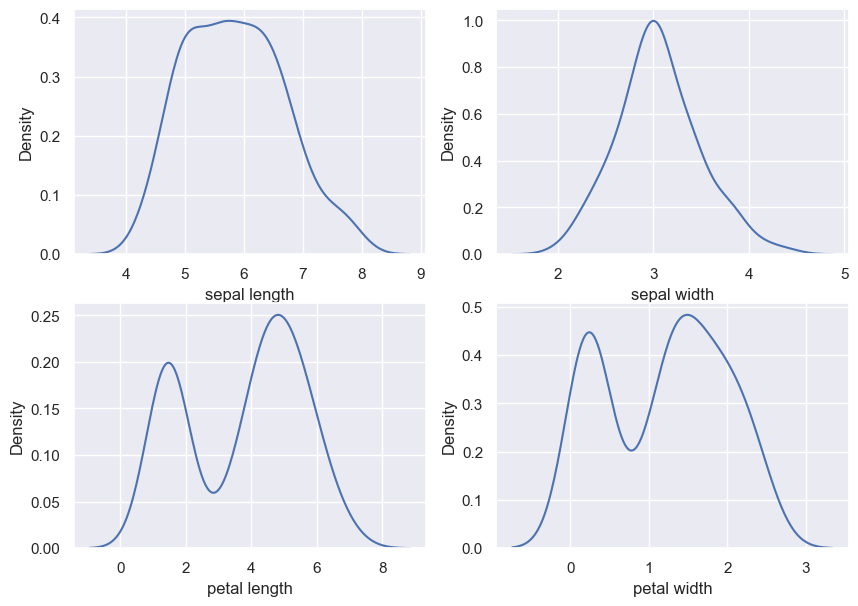

In [377]:
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(10, 7))
for column, x in zip(fl_df.iloc[:,0:], [[0,0],[0,1],[1,0],[1,1]]):
    sns.kdeplot(fl_df[column], ax=axs[x[0]][x[1]])

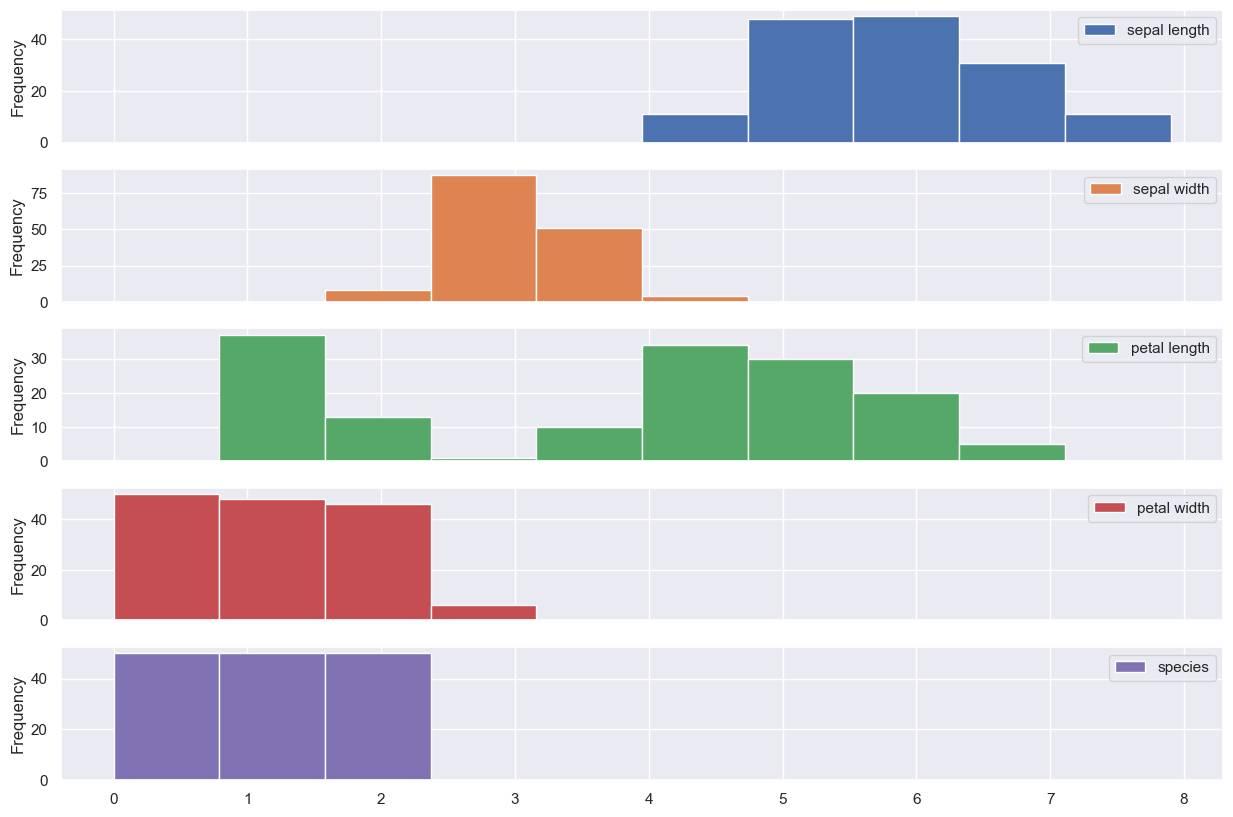

In [381]:
fl_df.plot.hist(subplots=True, figsize = (15, 10));

Рассмотрим длину лепестков (petal length) подробнее и воспользуемся для этого violin плотом. Нарисуйте распределение длины лепестков ирисов из предыдущего датасэта с помощью violin плота и выберите правильный (такой же) вариант среди предложенных

<AxesSubplot:ylabel='petal length'>

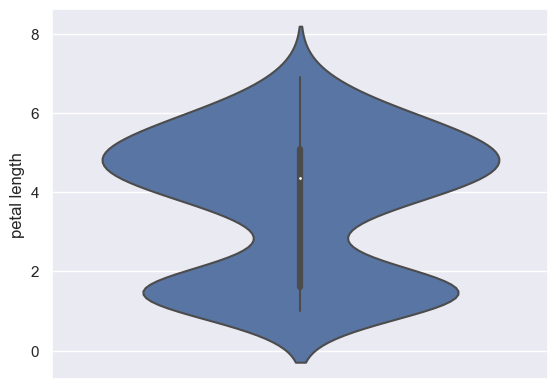

In [387]:
sns.violinplot(fl_df, y='petal length')

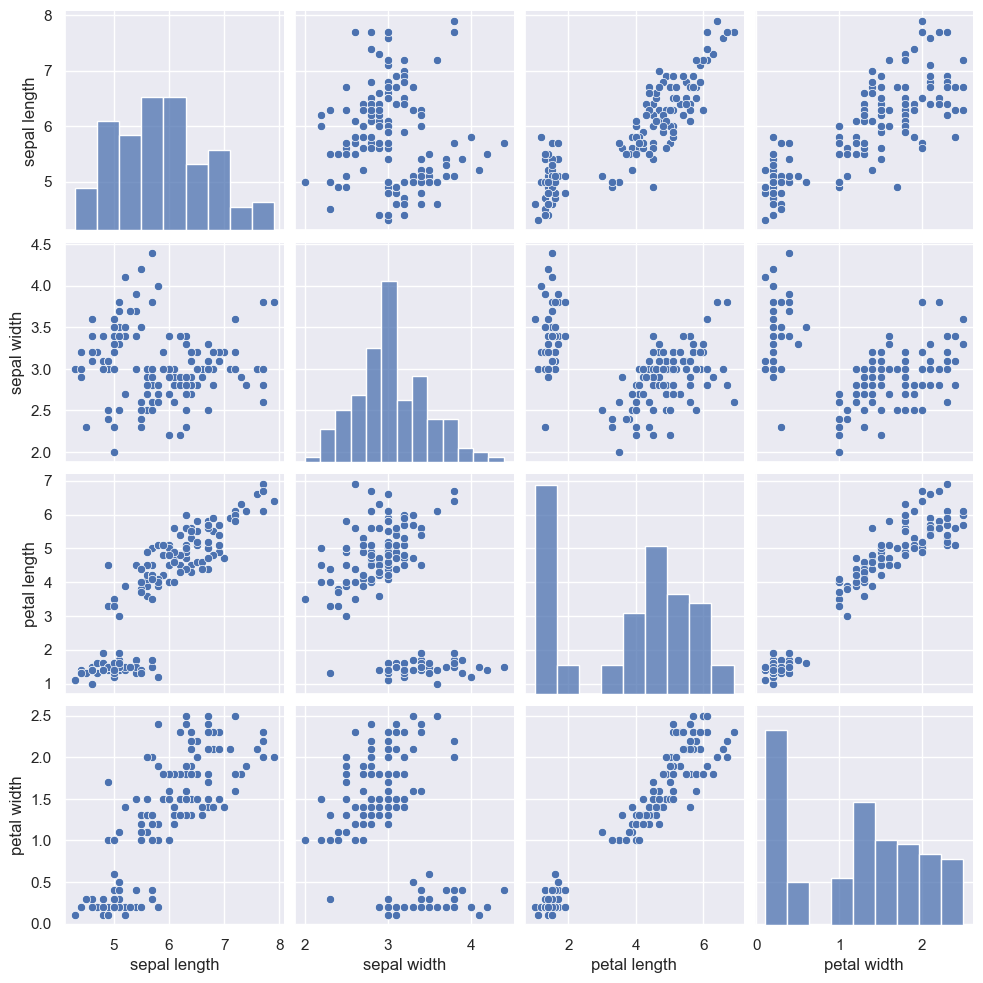

In [390]:
sns.pairplot(fl_df.drop('species', axis=1))

<AxesSubplot:>

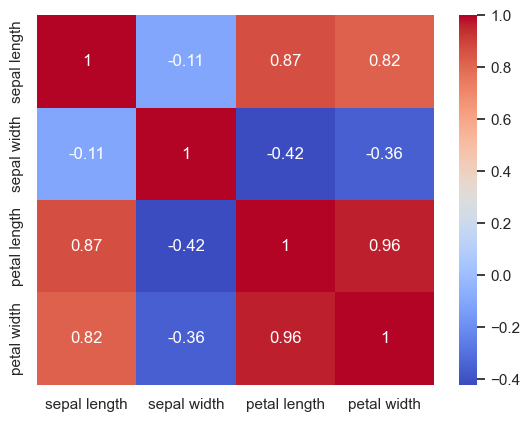

In [396]:
sns.heatmap(fl_df.drop('species', axis=1).corr(), cmap= 'coolwarm', annot=True)

<AxesSubplot:>

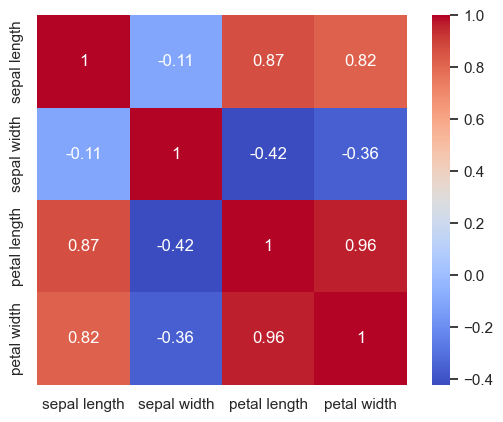

In [397]:
sns.heatmap(fl_df[fl_df.columns[0:4]].corr(), annot=True, square=True, cmap='coolwarm')

Любым удобным для вас способом создайте dataframe c именем my_data, в котором две колонки c именами (type - строки, value - целые числа) и четыре наблюдения в каждой колонке:
```
type value
A    10

A    14

B    12

B    23
```

In [400]:
my_data = pd.DataFrame(data={'type': ['A', 'A', 'B', 'B' ], 'value': [10, 14, 12, 23]})
my_data

,type,value
0,A,10
1,A,14
2,B,12
3,B,23


In [401]:
my_data = pd.DataFrame(data=[['A', 10], ['A', 14], ['B', 12], ['B', 23]], columns=['type', 'value'])
my_data

,type,value
0,A,10
1,A,14
2,B,12
3,B,23


In [402]:
my_data = pd.DataFrame({"type": list("AABB"), "value": [10, 14, 12, 23]})
my_data

,type,value
0,A,10
1,A,14
2,B,12
3,B,23


In [409]:
# перед выполнением read_clipboard скопировать результат из примера
df = pd.read_clipboard()

In [407]:
df.to_dict()

{'type': {0: 'A', 1: 'A', 2: 'B', 3: 'B'},
 'value': {0: 10, 1: 14, 2: 12, 3: 23}}

In [408]:
my_data = pd.DataFrame({'type': {0: 'A', 1: 'A', 2: 'B', 3: 'B'},
 'value': {0: 10, 1: 14, 2: 12, 3: 23}})
my_data

,type,value
0,A,10
1,A,14
2,B,12
3,B,23


Особенно важный навык при работе с данными - это умение быстро и эффективно отбирать нужные вам колонки или строки.

Начнем с простого, в dataframe с именем my_stat сохранено 20 строк и четыре колонки (V1, V2, V3, V4):

В переменную с именем subset_1 сохраните только первые 10 строк и только 1 и 3 колонку.
В переменную с именем subset_2 сохраните все строки кроме 1 и 5 и только 2 и 4 колонку.

Помните, что нумерация индексов строк и колонок начинается с 0.

Обратите внимание, получившиеся subset_1 и subset_2 - тоже должны быть dataframe.

In [4]:
my_stat = pd.read_csv('https://stepik.org/media/attachments/course/4852/my_stat.csv')
my_stat.head()

,V1,V2,V3,V4
0,2,13.0,B,1.0
1,-1,7.0,B,1.0
2,0,11.0,A,0.0
3,2,11.0,A,2.0
4,0,10.0,B,-1.0


In [428]:
subset_1 = my_stat.iloc[:10, [0,2]]
subset_2 = my_stat.drop([0, 4])
subset_2 = subset_2.iloc[:, [1,3]]

In [429]:
subset_1 = my_stat.iloc[:10, [0, 2]]
subset_2 = my_stat.iloc[:, [1, 3]].query('index != 0 and index != 4')

In [430]:
subset_1, subset_2 = my_stat.iloc[0:10, [0, 2]], my_stat.iloc[~my_stat.index.isin([0, 4]), [1, 3]]

In [431]:
subset_1 = my_stat[['V1','V3']].head(10)
subset_2 = my_stat[['V2','V4']].drop(my_stat.index[[0,4]])

In [432]:
subset_1 = my_stat.iloc[0:10, [0, 2]]
subset_2 = my_stat.drop([0, 4]).iloc[:, [1, 3]]

Теперь потренируемся отбирать нужные нам наблюдения (строки), соответствующие некому условию. В dataframe с именем my_stat четыре колонки V1, V2, V3, V4:

В переменную subset_1 сохраните только те наблюдения, у которых значения переменной V1  строго больше 0, и значение переменной V3  равняется 'A'.

В переменную  subset_2  сохраните только те наблюдения, у которых значения переменной V2  не равняются 10, или значения переменной V4 больше или равно 1.

Как и в предыдущей задаче результат фильтрации - это тоже dataframe.

Фильтрацию данных можно осуществить разными способами, например так или так.

In [7]:
subset_1 = my_stat.query('V1 > 0 & V3 =="A"')
subset_2 = my_stat.query('V2 != 10 | V4 >= 1')

In [8]:
%timeit subset_1 = my_stat[(my_stat['V1'] > 0) & (my_stat['V3'] == 'A')]
%timeit subset_1 = my_stat.query("(V1 > 0) and (V3 == 'A')" )

%timeit subset_2 = my_stat[(my_stat['V2'] != 10) | (my_stat['V4'] >= 1)]
%timeit subset_2 = my_stat.query("(V1 > 0) and (V3 == 'A')" )

517 µs ± 120 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
1.29 ms ± 8.5 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
433 µs ± 6.52 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
1.28 ms ± 8.97 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [9]:
%timeit subset_1 = my_stat[(my_stat['V1'] > 0) & (my_stat['V3'] == 'A')]
%timeit subset_1 = my_stat.query("(V1 > 0) and (V3 == 'A')" )
%timeit subset_1 = my_stat.iloc[np.where((my_stat.V1.values>0)&(my_stat.V3.values=='A'))]

%timeit subset_2 = my_stat[(my_stat['V2'] != 10) | (my_stat['V4'] >= 1)]
%timeit subset_2 = my_stat.query("(V1 > 0) and (V3 == 'A')" )
%timeit subset_2 = my_stat.iloc[np.where((my_stat.V2.values!=10)|(my_stat.V4.values>=1))]

559 µs ± 185 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
1.28 ms ± 3.64 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
218 µs ± 13.3 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
439 µs ± 15.3 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
1.47 ms ± 322 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
246 µs ± 41.9 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


Теперь давайте преобразуем наши данные. В переменной my_stat лежат данные с которыми вам необходимо проделать следующее дейтвие. В этих данных (my_stat) создайте две новые переменных:

V5 = V1 + V4

V6 = натуральный логарифм переменной V2

Где найти натуральный логарифм?

In [10]:
my_stat['V5'] = my_stat.V1 + my_stat.V4
my_stat['V6'] = np.log(my_stat.V2)
my_stat

,V1,V2,V3,V4,V5,V6
0,2,13.0,B,1.0,3.0,2.564949
1,-1,7.0,B,1.0,0.0,1.945910
2,0,11.0,A,0.0,0.0,2.397895
3,2,11.0,A,2.0,4.0,2.397895
4,0,10.0,B,-1.0,-1.0,2.302585
...,...,...,...,...,...,...
495,1,8.0,A,-1.0,0.0,2.079442
496,3,8.0,A,1.0,4.0,2.079442
497,-1,11.0,B,2.0,1.0,2.397895
498,1,11.0,A,2.0,3.0,2.397895


In [11]:
my_stat=my_stat.assign(V5 = my_stat.V1+my_stat.V4, V6 = np.log(my_stat.V2))

In [12]:
my_stat.eval('V5 = V1 + V4', inplace=True)
my_stat.eval('V6 = log(V2)', inplace=True)

Отличная работа, закрепим еще пару важных вопросов и можно двигаться дальше.

Переменные V1, V2  ... такие имена никуда не годятся. С такими названиями легко запутаться в собственных данных и в результате ошибиться в расчетах.

Переименуйте колонки в данных  my_stat следующим образом:

V1 -> session_value

V2 -> group

V3 -> time

V4 -> n_users

In [16]:
my_stat = pd.read_csv('https://stepik.org/media/attachments/course/4852/my_stat.csv')

In [18]:
my_stat=my_stat.rename(columns={'V1': 'session_value', 'V2': 'group', 'V3': 'time', 'V4': 'n_users'})
my_stat

,session_value,group,time,n_users
0,2,13.0,B,1.0
1,-1,7.0,B,1.0
2,0,11.0,A,0.0
3,2,11.0,A,2.0
4,0,10.0,B,-1.0
...,...,...,...,...
495,1,8.0,A,-1.0
496,3,8.0,A,1.0
497,-1,11.0,B,2.0
498,1,11.0,A,2.0


In [24]:
for _ in range(10):
    my_stat = pd.read_csv('https://stepik.org/media/attachments/course/4852/my_stat.csv')
    %timeit my_stat.columns = {'session_value':'V1', 'group':'V2', 'time':'V3', 'n_users':'V4'}
    my_stat = pd.read_csv('https://stepik.org/media/attachments/course/4852/my_stat.csv')
    %timeit my_stat.columns = ['session_value','group','time','n_users']
    my_stat = pd.read_csv('https://stepik.org/media/attachments/course/4852/my_stat.csv')
    %timeit my_stat.rename(columns={'V1': 'session_value', 'V2': 'group', 'V3': 'time', 'V4': 'n_users'}, inplace=True)
    print('===============')

95.9 µs ± 7.89 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
80.8 µs ± 321 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
249 µs ± 1.44 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
85.6 µs ± 2.32 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
90 µs ± 13.3 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
248 µs ± 3.3 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
93.8 µs ± 9.11 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
83 µs ± 2.4 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
245 µs ± 2.02 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
84.4 µs ± 1.42 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
85.7 µs ± 4.59 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
234 µs ± 10.4 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
77.1 µs ± 212 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
75.9 µs ± 912 ns per loop (mean ± std. dev

### Замена
И напоследок давайте разберемся, как заменять наблюдения в данных.

В dataframe с именем my_stat сохранены данные с 4 колонками: session_value, group, time, n_users.

В переменной session_value замените все пропущенные значения на нули.

В переменной n_users замените все отрицательные значения на медианное значение переменной n_users (без учета отрицательных значений, разумеется).

Как получить медиану переменной n_users без учета отрицательных значений? Если не придумали решения, подсказка - ищите один из возможных ответов в задачах, которые мы уже решили.

Данные для тренировки.

In [102]:
my_stat = pd.read_csv('https://stepik.org/media/attachments/course/4852/my_stat.csv')
my_stat.columns = {'session_value':'V1', 'group':'V2', 'time':'V3', 'n_users':'V4'}
my_stat['session_value'] = my_stat['session_value'].fillna(0)
my_stat.loc[my_stat['n_users'] < 0, 'n_users'] = my_stat.n_users[my_stat.n_users >= 0.0].median()
my_stat['n_users'] = abs(my_stat['n_users'])
my_stat

,session_value,group,time,n_users
0,2,13.0,B,1.0
1,-1,7.0,B,1.0
2,0,11.0,A,0.0
3,2,11.0,A,2.0
4,0,10.0,B,1.0
...,...,...,...,...
495,1,8.0,A,1.0
496,3,8.0,A,1.0
497,-1,11.0,B,2.0
498,1,11.0,A,2.0


In [106]:
my_stat = pd.read_csv('https://stepik.org/media/attachments/course/4852/my_stat.csv')
my_stat.columns = {'session_value':'V1', 'group':'V2', 'time':'V3', 'n_users':'V4'}
my_stat = my_stat.fillna(0)
my_stat.loc[my_stat.n_users<0, 'n_users']=my_stat.query("n_users>=0").n_users.median()
my_stat

,session_value,group,time,n_users
0,2,13.0,B,1.0
1,-1,7.0,B,1.0
2,0,11.0,A,0.0
3,2,11.0,A,2.0
4,0,10.0,B,1.0
...,...,...,...,...
495,1,8.0,A,1.0
496,3,8.0,A,1.0
497,-1,11.0,B,2.0
498,1,11.0,A,2.0


In [107]:
my_stat = pd.read_csv('https://stepik.org/media/attachments/course/4852/my_stat.csv')
my_stat.columns = {'session_value':'V1', 'group':'V2', 'time':'V3', 'n_users':'V4'}
%timeit my_stat.n_users = my_stat.n_users.apply(lambda x: x if x >= 0 else my_stat.n_users[my_stat.n_users >= 0].median())

my_stat = pd.read_csv('https://stepik.org/media/attachments/course/4852/my_stat.csv')
my_stat.columns = {'session_value':'V1', 'group':'V2', 'time':'V3', 'n_users':'V4'}
%timeit my_stat.n_users.where(my_stat.n_users >= 0, my_stat.n_users[my_stat.n_users >= 0].median(), inplace=True)

my_stat = pd.read_csv('https://stepik.org/media/attachments/course/4852/my_stat.csv')
my_stat.columns = {'session_value':'V1', 'group':'V2', 'time':'V3', 'n_users':'V4'}
%timeit my_stat.loc[my_stat.n_users < 0, 'n_users'] = my_stat[my_stat.n_users >= 0].n_users.median()

my_stat = pd.read_csv('https://stepik.org/media/attachments/course/4852/my_stat.csv')
my_stat.columns = {'session_value':'V1', 'group':'V2', 'time':'V3', 'n_users':'V4'}
%timeit my_stat.loc[my_stat.n_users < 0, 'n_users'] = my_stat.query('n_users >= 0').n_users.median()

346 µs ± 4.83 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
772 µs ± 7.38 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
728 µs ± 1.27 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
1.32 ms ± 5.24 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [112]:
my_stat = pd.read_csv('https://stepik.org/media/attachments/course/4852/my_stat.csv')
my_stat.columns = {'session_value':'V1', 'group':'V2', 'time':'V3', 'n_users':'V4'}
my_stat = my_stat.replace({'n_users':[my_stat.n_users[my_stat.n_users < 0]]}, my_stat[my_stat.n_users >= 0].n_users.median())
my_stat

,session_value,group,time,n_users
0,2,13.0,B,1.0
1,-1,7.0,B,1.0
2,0,11.0,A,0.0
3,2,11.0,A,2.0
4,0,10.0,B,1.0
...,...,...,...,...
495,1,8.0,A,1.0
496,3,8.0,A,1.0
497,-1,11.0,B,2.0
498,1,11.0,A,2.0


In [117]:
my_stat = pd.read_csv('https://stepik.org/media/attachments/course/4852/my_stat.csv')
my_stat.columns = {'session_value':'V1', 'group':'V2', 'time':'V3', 'n_users':'V4'}
df1 = my_stat.session_value.fillna(0)
my_stat.update(df1)

%timeit my_stat.n_users = my_stat.n_users.replace([my_stat.n_users[my_stat.n_users < 0]], my_stat[my_stat.n_users >=0].n_users.median())

1.13 ms ± 19.8 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
